In [337]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [338]:
#read the dataset

ar = pd.read_csv('AirQualityUCI/AirQualityUCI.csv', sep=';', decimal=',')
# ar.head()

In [339]:
#Dropping CO(GT) and Unnamed columns
ar.drop(['Unnamed: 15','Unnamed: 16'],axis = 1,inplace = True)

In [340]:
#Formatting some object columns from strings to floats

ar.replace(to_replace=',',value='.',regex=True,inplace=True) 

for i in 'C6H6(GT) T RH AH'.split():
    ar[i] = pd.to_numeric(ar[i],errors='coerce') 

In [341]:
#Replacing null data from -200 to NaN for posterior treatment

ar.replace(to_replace=-200,value=np.nan,inplace=True)

# ar.info()

In [342]:
#Formatting Date and Time to datetime type

ar['Date'] = pd.to_datetime(ar['Date'],dayfirst=True) 

ar['Time'] = pd.to_datetime(ar['Time'],format= '%H.%M.%S' ).dt.time

# ar.head()

In [343]:
# NMHC_ratio = ar['NMHC(GT)'].isna().sum()/len(ar['NMHC(GT)'])

# print('The NMHC(GT) sensor has {:.2f}% of missing data.'.format(NMHC_ratio*100))

In [344]:
#Removing NMHC(GT) sensor due to amount of null values

ar.drop('NMHC(GT)', axis=1, inplace=True) 


In [345]:
ar1=ar.dropna()

In [346]:
# Eliminating all duplicated rows with drop_duplicates
ar1.drop_duplicates(inplace= True)

C:\Users\adity\AppData\Local\Temp\ipykernel_31884\4073223878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ar1.drop_duplicates(inplace= True)


In [347]:
# To check whether there duplicated values or not using the function Assert 
assert ar1.duplicated().sum() == 0

In [348]:
# To check wether there unique values in Dataset
ar1.apply(lambda x: len(x.unique()))

Date              341
Time               24
CO(GT)             94
PT08.S1(CO)      1016
C6H6(GT)          392
PT08.S2(NMHC)    1189
NOx(GT)           896
PT08.S3(NOx)     1129
NO2(GT)           274
PT08.S4(NO2)     1543
PT08.S5(O3)      1693
T                 428
RH                742
AH               5460
dtype: int64

In [349]:
#Eliminating rows with NaN values 

ar1_filt = ar1.dropna(how='any', axis=0)
ar1_filt.reset_index(drop=True,inplace=True)


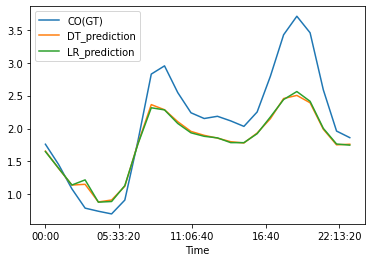

In [356]:
#Identify the train test ratio for data until September

X = ar1_filt.sort_values('Time')[['Time','PT08.S1(CO)','CO(GT)']]

threshold_time = datetime.time(5,0,0)


# X_train = X['PT08.S1(CO)'].iloc[X['Time']<threshold_time]
X_train = X.loc[X['Time']<threshold_time][['Time','PT08.S1(CO)']]

X_test = X.loc[X['Time']>=threshold_time][['Time','PT08.S1(CO)']]

y_train = X.loc[X['Time']<threshold_time]['CO(GT)']
y_test = X.loc[X['Time']>=threshold_time]['CO(GT)']

# X_train.head()
# y_train.head()
DTModel = GradientBoostingRegressor(random_state=0)
LRModel = LinearRegression()
DTModel.fit(X_train[['PT08.S1(CO)']], y_train)

LRModel.fit(X_train[['PT08.S1(CO)']], y_train)

y_pred_train_dt = DTModel.predict(X_train[['PT08.S1(CO)']])
y_pred_test_dt = DTModel.predict(X_test[['PT08.S1(CO)']])

y_pred_train_lr = LRModel.predict(X_train[['PT08.S1(CO)']])
y_pred_test_lr = LRModel.predict(X_test[['PT08.S1(CO)']])

X['DT_prediction'] = np.append(y_pred_train_dt, y_pred_test_dt)
X['LR_prediction'] = np.append(y_pred_train_lr, y_pred_test_lr)

new_arr = X.groupby('Time').mean()
new_arr = new_arr.drop(columns=['PT08.S1(CO)'])
new_arr.plot()
# plot_tree(DTModel)
plt.show()
# print(r2_score(y_train, y_pred_train_dt), 'r2 score training data dt')


# print(r2_score(y_test, y_pred_test_dt), 'r2 score test data dt')


# print(r2_score(y_train, y_pred_train_lr), 'r2 score training data lr')

# print(r2_score(y_test, y_pred_test_lr), 'r2 score test data lr')


# plt.plot(X_train[['Time']], y_train)
# plt.plot(X_train[['Time']], y_pred)
# plt.show()


